# K-means Example

## Preliminary

In [34]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
import matplotlib.pyplot as plt
import numpy as np
import random
import sys

sys.path.append("..")

import eskmeans.kmeans

In [36]:
# Utility variables and functions

colors = np.array([x for x in "bgrcmykbgrcmykbgrcmykbgrcmyk"])
colors = np.hstack([colors] * 20)

def plot_mixture_model(ax, model):
    X = np.array(model.X)
    ax.scatter(X[:, 0], X[:, 1], color=colors[model.assignments].tolist(), s=10)

## Toy dataset

In [37]:
random.seed(2)
np.random.seed(2)

# Data parameters
D = 2           # dimensions
N = 100         # number of points to generate
K_true = 4      # the true number of components

# Generate data
mu_scale = 4.0
covar_scale = 0.7
z_true = np.random.randint(0, K_true, N)
mu = np.random.randn(D, K_true)*mu_scale
X = mu[:, z_true] + np.random.randn(D, N)*covar_scale
X = X.T

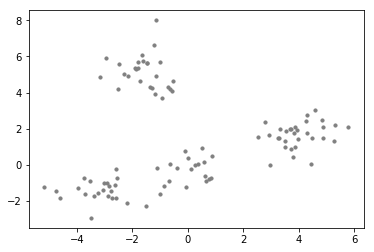

In [38]:
plt.scatter(X[:, 0], X[:, 1], color="gray", s=10)

## K-means clustering

In [64]:
# Model parameters
K = 4 # number of components
n_iter = 20

# Setup k-means model
kmeans = eskmeans.kmeans.KMeans(X, K, "spread")

In [65]:
# Inference
%time record = kmeans.fit(n_iter)

Iteration: 0, K: 4, n_mean_updates: 59, sample_time: 0.00274610519409, sum_neg_sqrd_norm: -209.026209201
Iteration: 1, K: 4, n_mean_updates: 10, sample_time: 0.00128412246704, sum_neg_sqrd_norm: -133.688881636
Iteration: 2, K: 4, n_mean_updates: 6, sample_time: 0.00156092643738, sum_neg_sqrd_norm: -109.921387903
Iteration: 3, K: 4, n_mean_updates: 1, sample_time: 0.00108098983765, sum_neg_sqrd_norm: -108.302238117
Iteration: 4, K: 4, n_mean_updates: 0, sample_time: 0.000996112823486, sum_neg_sqrd_norm: -108.302238117
CPU times: user 8.33 ms, sys: 138 µs, total: 8.47 ms
Wall time: 7.74 ms


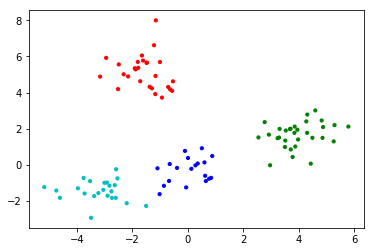

In [66]:
# Plot clusters
fig = plt.figure()
ax = fig.add_subplot(111)
plot_mixture_model(ax, kmeans)